In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
single_image = X_train[1000]

In [ ]:
single_image.shape

(28, 28)

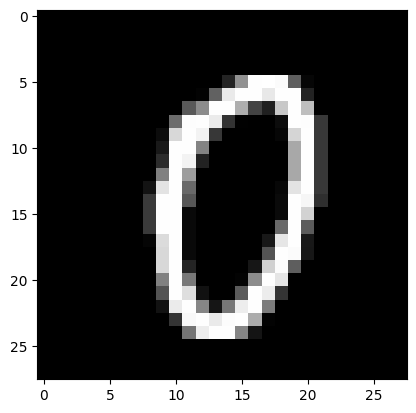

In [ ]:
plt.imshow(single_image,cmap = 'gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

In [ ]:
y_train_onehot.shape

(60000, 10)

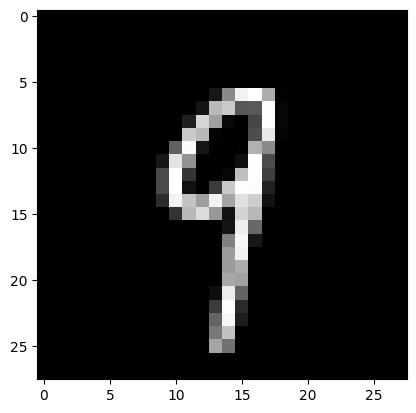

In [ ]:
single_image = X_train[900]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[490]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 83s 87ms/step - loss: 0.2731 - accuracy: 0.9400 - val_loss: 0.0944 - val_accuracy: 0.9778
Epoch 2/5
938/938 [==============================] - 74s 79ms/step - loss: 0.0786 - accuracy: 0.9800 - val_loss: 0.0716 - val_accuracy: 0.9783
Epoch 3/5
938/938 [==============================] - 71s 76ms/step - loss: 0.0527 - accuracy: 0.9859 - val_loss: 0.0553 - val_accuracy: 0.9831
Epoch 4/5
938/938 [==============================] - 72s 77ms/step - loss: 0.0370 - accuracy: 0.9903 - val_loss: 0.0489 - val_accuracy: 0.9855
Epoch 5/5
938/938 [==============================] - 70s 75ms/step - loss: 0.0280 - accuracy: 0.9927 - val_loss: 0.0516 - val_accuracy: 0.9834


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.273123,0.940017,0.094357,0.9778
1,0.078613,0.980017,0.071632,0.9783
2,0.052710,0.985883,0.055285,0.9831
3,0.036956,0.990300,0.048871,0.9855
4,0.027967,0.992750,0.051568,0.9834


<Axes: >

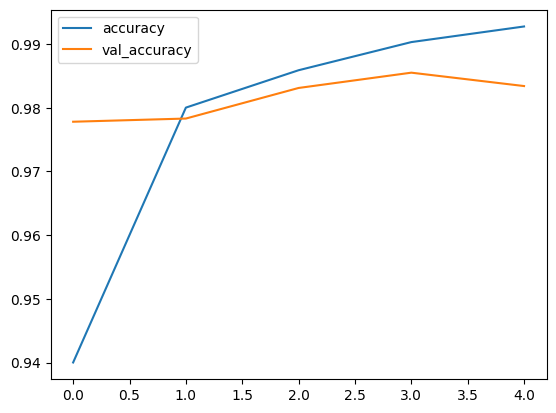

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

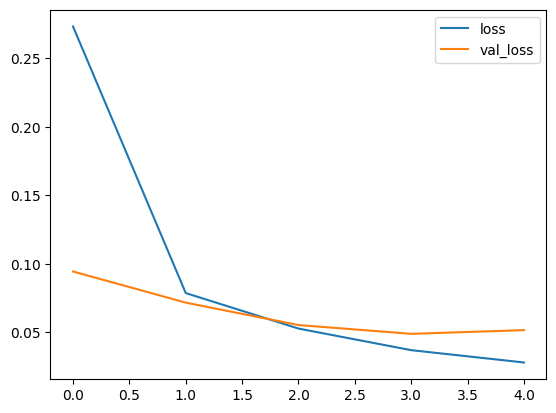

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 974    0    2    0    0    0    1    0    2    1]
 [   0 1121    4    1    1    0    3    4    1    0]
 [   2    3 1010    0    2    0    2    7    5    1]
 [   0    0    1  993    0    9    0    2    3    2]
 [   0    0    0    0  964    0    4    1    2   11]
 [   2    0    2    2    1  878    3    0    3    1]
 [   8    2    0    0    3    3  938    0    4    0]
 [   1    2   10    1    0    0    0 1011    2    1]
 [   5    0    3    0    1    2    1    3  957    2]
 [   1    1    0    1    4    5    0    5    4  988]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('7.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('7.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
print(x_single_prediction)

[8]


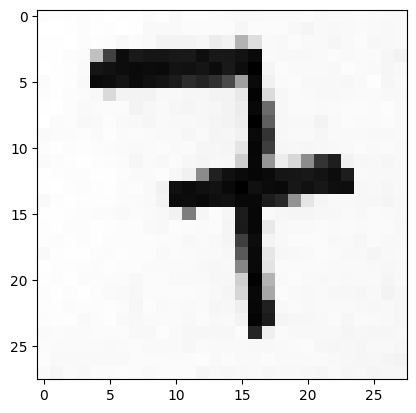

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
print(x_single_prediction)

[3]
